In [1]:
#Main Packages
import pandas as pd
import numpy as np
import json
import seaborn as sns
import itertools

#Plotting
import matplotlib.pyplot as plt
from xgboost import plot_importance

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Sklearn metrics
from sklearn.metrics import mean_squared_error, get_scorer_names, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


#Imbalanced learning package for synthetic data
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids

#Model Packages
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [2]:
df = pd.read_csv('GKFlagMarginData.csv')

In [3]:
#df = df[df['Age'] < 20]
#df = df[(df['Age'] < 25) & (df['Age'] > 20)]
#df = df[(df['Age'] < 30) & (df['Age'] > 25)]
#df = df[df['Age'] > 30]

In [4]:
df

,GKFlag,Age,Prof,Det,Amb,Mins,Av Rat,Imp M,Pres,Cons,Ada,Inj Pr,WR,CA,Margin,Training facilities,Div Rep,Growth
0,0,34.061602,7,8,11,51,6.70,11,8,10,10,14,3000,92,30,10,107,-11
1,0,41.494867,18,17,8,4380,6.84,14,13,6,14,1,2400,70,50,3,46,-10
2,1,36.024641,12,13,11,540,6.77,13,12,13,9,5,2000,73,39,6,85,-6
3,0,35.244353,18,15,12,3703,7.21,13,16,12,10,14,1250,69,36,3,46,-4
4,0,35.331964,15,16,15,3837,6.56,11,12,12,17,6,2900,103,25,12,107,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30251,0,16.388775,10,13,10,0,0.00,5,11,7,19,11,50,31,57,5,107,1
30252,0,16.205339,14,10,9,0,0.00,4,11,6,7,12,50,33,60,5,107,4
30253,0,16.265572,12,13,11,0,0.00,4,8,13,14,5,50,30,60,5,107,6
30254,0,16.232717,11,7,13,0,0.00,9,12,6,9,7,50,36,47,5,107,0


In [5]:
x = df.drop(['Growth'], axis=1)
y = df['Growth']

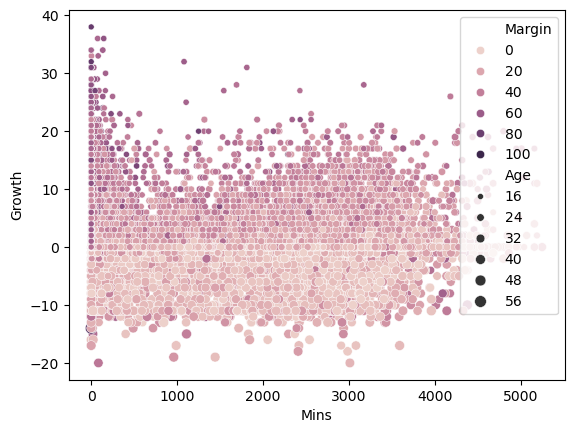

In [6]:
sns.scatterplot(x= 'Mins', 
           y= 'Growth', 
           data=df, 
           hue= 'Margin',
           size = 'Age'
)

plt.xlabel("Mins")
plt.ylabel("Growth")
 
plt.show()

In [7]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split( 
    x, y, test_size=0.2, random_state=2023)

In [9]:
classifier = LinearRegression() 
classifier.fit(xtrain, ytrain)

LinearRegression()

In [10]:
y_pred = classifier.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 13.770758335736657


In [11]:
#dtrain = xgb.DMatrix(xtrain, label=ytrain, device='cuda')
#dtest = xgb.DMatrix(xtest, device='cuda')

In [12]:
estimators = [
    ('clf', XGBRegressor(random_state=123, device = 'cuda',tree_method = 'hist',n_jobs = 12)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)

In [13]:
search_space = {
    'clf__max_depth': Integer(2,20),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.2, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 20.0),
    'clf__n_estimators': Integer(100,1000),
}

opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=20, scoring='neg_mean_squared_error', random_state=123)

In [14]:
#opt.fit(xtrain, ytrain)

In [15]:
#opt.best_estimator_

In [16]:
#opt.best_score_

In [17]:
#opt.score(xtest, ytest)

In [18]:
#opt.best_estimator_.steps

Full model:

model = XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=1.0, colsample_bynode=0.8176982511815358,
               colsample_bytree=0.9709547022375811, device='cuda',
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0.41223199803213983,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.02469011771629507,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, monotone_constraints=None,
               multi_strategy=None, n_estimators=795, n_jobs=12,
               num_parallel_tree=None, random_state=123)

In [19]:
model = XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=1.0, colsample_bynode=0.8176982511815358,
               colsample_bytree=0.9709547022375811, device='cuda',
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0.41223199803213983,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.02469011771629507,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, monotone_constraints=None,
               multi_strategy=None, n_estimators=795, n_jobs=12,
               num_parallel_tree=None, random_state=123)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print ("MAE: ", mean_absolute_error(ytest, y_pred))

MAE:  1.8095238493793624


/home/macaco3001/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:09:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Text(0.5, 1.0, 'Feature Importance')

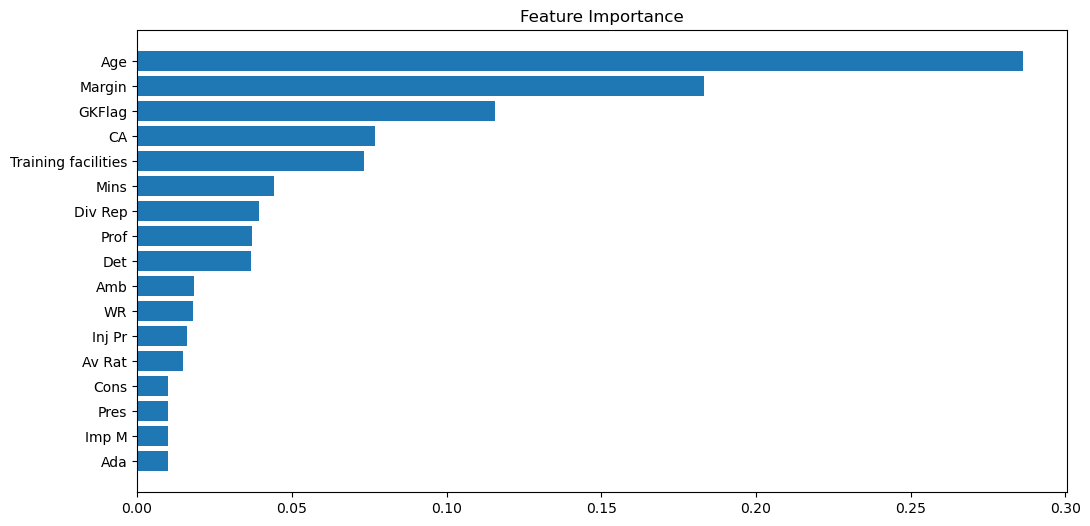

In [20]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df.drop(['Growth'], axis=1).columns)[sorted_idx])
plt.title('Feature Importance')

In [21]:
import shap

# explain the model's predictions using SHAP
explainer = shap.Explainer(model,feature_names = list(df.drop(['Growth'], axis=1).columns))
shap_values = explainer(xtest)

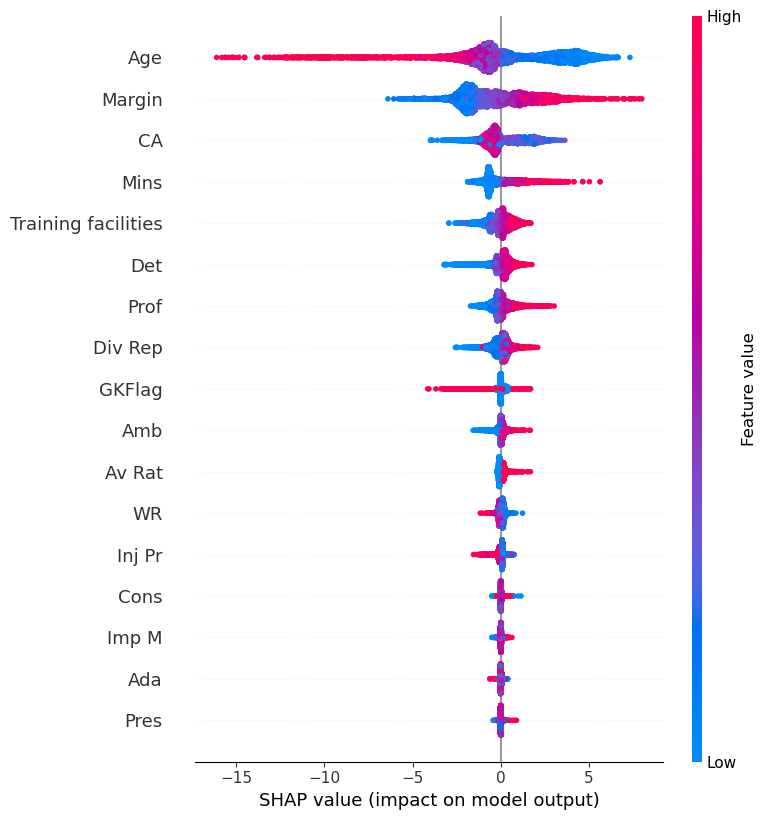

In [22]:
shap.summary_plot(shap_values, xtest)

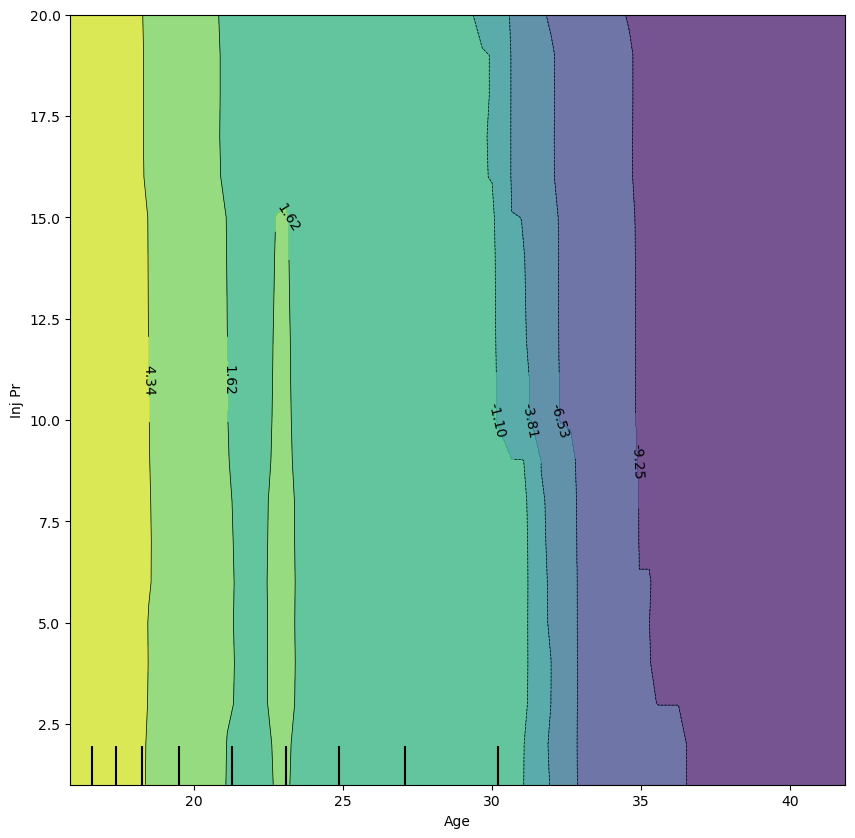

In [60]:
from sklearn.inspection import PartialDependenceDisplay

#features = list(range(16))
features = [('Age','Inj Pr')]
PartialDependenceDisplay.from_estimator(model, xtest, features, feature_names=list(df.drop(['Growth'], axis=1).columns),
                        n_jobs=12, grid_resolution=80, percentiles=(0,1))
fig = plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(10)
fig.subplots_adjust(wspace=1, hspace=0.5)